Region-based Segmentation

(192, 263, 3)


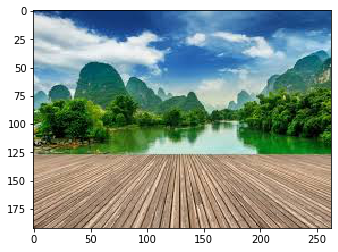

In [11]:
# tutorial link:
# https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/

from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

# Region-based Segmentation
image = plt.imread('1.jpeg')

print(image.shape)

plt.imshow(image)

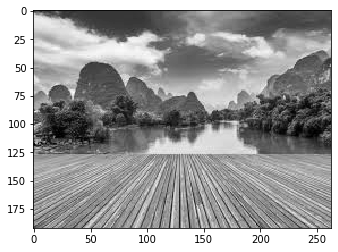

In [12]:
gray = rgb2gray(image)
plt.imshow(gray,cmap='gray')

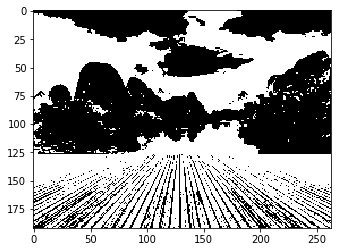

In [13]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

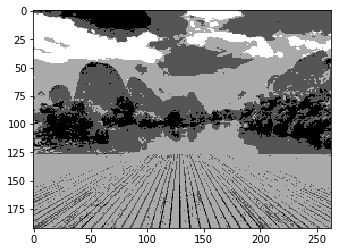

In [14]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Edge Detection Segmentation

Sobel filter (horizontal) =
1 	2 	1
0 	0 	0
-1 	-2 	-1

 

Sobel filter (vertical) =
-1 	0 	1
-2 	0 	2
-1 	0 	1

detect both horizontal and vertical edges at the same time. This is called the laplace operator:
1 	1 	1
1 	-8 	1
1 	1 	1

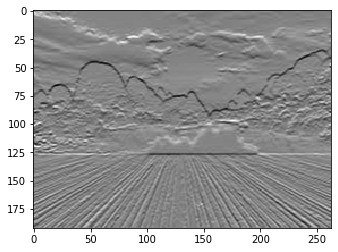

In [15]:
image = plt.imread('1.jpeg')
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])

out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')

# here mode determines how the input array is extended when the filter overlaps a border.

plt.imshow(out_h, cmap='gray')

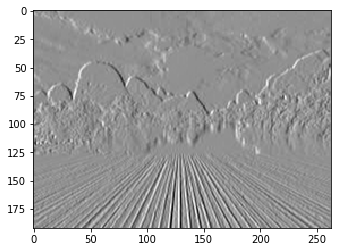

In [16]:
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
plt.imshow(out_v, cmap='gray')

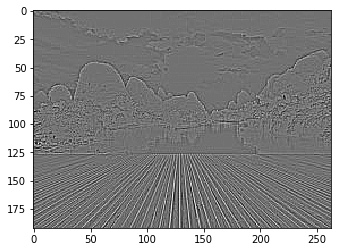

In [17]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

Image Segmentation based on Clustering

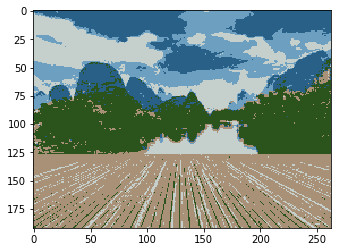

In [18]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1

pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)